In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

ibmqfactory.load_account:WARNING:2023-06-06 14:51:59,181: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[(i + 1)%n] - 1) for i in range(n)])

def effective_hem(size, J):
    hem = np.zeros((2**size, 2**size))
    for i in range(2**size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1)**int(i) for i in binary]
        hem[i,i] = h(size, J, Z)
    return hem

In [20]:
from scipy.linalg import expm
import random
fullRes = []
#n = 4

Js = []
t = 0.5
#shots are spaced linearly 500 apart
shots = np.arange(500, 10500, 500)
print(shots)
for n in range(2,6):
    J = [random.gauss(1, 0.1) for _ in range(n)]
    Js.append(J)
    res = []
    for s in shots:
        qc = QuantumCircuit(n)
        for i in range(n):
            qc.h(i)

        U = expm((-1j*t)*effective_hem(n,J))
        U = qi.Operator(U)

        qc.unitary(U, [i for i in range(n)])

        for i in range(n):
            qc.h(i)
        qc.measure_all()
        #qc.measure(qr[1],cr[1])

        #Simulator
        qcomp = Aer.get_backend("qasm_simulator")
        result = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=s).result()
        res.append(result.get_counts())
    fullRes.append(res)

[  500  1000  1500  2000  2500  3000  3500  4000  4500  5000  5500  6000
  6500  7000  7500  8000  8500  9000  9500 10000]


In [21]:

from itertools import permutations
import CalculateCrossTalk
fullDist = []
fullGuess = []
#calculate distance between two lists
def calc_dist(a,b):
    min_dist = float('inf')
    for perm in permutations(b):
        dist = np.sum([np.abs(ai-bi) for ai, bi in zip(a, perm)])
        if dist < min_dist:
            min_dist = dist
    return min_dist

for i in range(len(fullRes)):
    res = fullRes[i]
    J = Js[i]
    n = i+2
    guesses = []
    dist = []
    for i in range(len(res)):
        guess = CalculateCrossTalk.one_dim(t,res[i], n)
        guesses.append(guess)
        dist.append(calc_dist(guess,J))
    fullDist.append(dist)
    fullGuess.append(guesses)

416.0
168.0
1828.6666666666665
240.66666666666663
1706.0
2820.6666666666665
834.6666666666665
1768.6666666666665
6344.666666666666
24.666666666666664
3244.6666666666665
138.66666666666669
732.6666666666666
2678.0
4402.666666666666
4328.666666666666
3272.0
9922.666666666666
5048.666666666666
4902.0
592.2091371691814
227.85265127098978
826.3369011747179
1415.2116659785868
1187.0303583797618
2710.9186186202696
1326.6705573426652
969.0324768762766
3064.607333215736
534.7683248593513
1123.4487869406248
1244.9859473289841
1517.8024038699407
460.57216506836477
2611.0009460746433
5271.777974374549
1765.7168439364877
10050.029263388955
940.7718507423174
2839.219688608293
156.10613132262495
1032.3769365924754
1381.6473113546115
631.0964538331971
1072.5092777698478
2099.6414913430904
4448.790803708798
1675.2780241160413
4149.948439267186
3714.6687934230567
6751.553428939059
5590.093345282019
2697.223716814678
3177.2266323526583
2289.072390893911
6199.8796272149775
4790.616929787475
3693.136856418

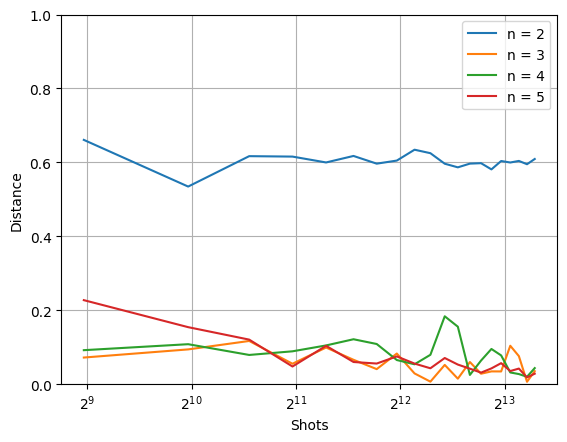

In [22]:
plt.grid()
plt.ylabel('Distance')
plt.xlabel('Shots')
plt.ylim(0, 1)
for i in range(len(fullDist)):
    dist = fullDist[i]
    plt.plot(shots, dist, label = f'n = {str(i+2)}')
plt.xscale('log', base=2)
plt.legend()
